<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-580764-1694665306/blob/main/Assignment_22_Sept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
fileP="/content/WA_Fn-UseC_-HR-Employee-Attrition.csv"
df=pd.read_csv(fileP)

In [15]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [16]:
df.shape

(1470, 35)

In [17]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [18]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No null Values present

In [19]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

EmployeCount, Over18 and StandardHours have only one value.
 Therefore Dropping them

In [20]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)
df.shape

(1470, 32)

<Axes: xlabel='Attrition', ylabel='count'>

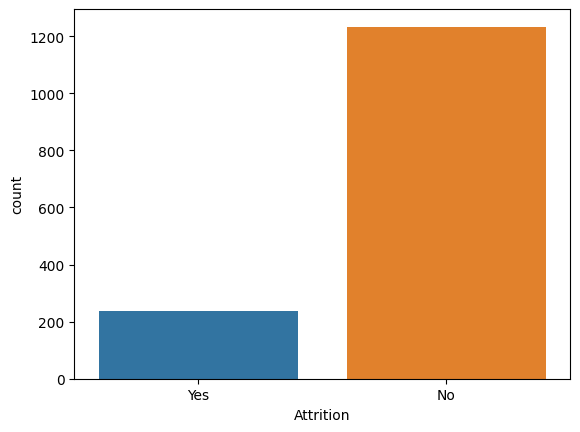

In [22]:
sns.countplot(x='Attrition', data=df, label='Count')

In [23]:
df.groupby('Attrition').mean()

<ipython-input-23-88c1264005d6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Attrition').mean()


,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


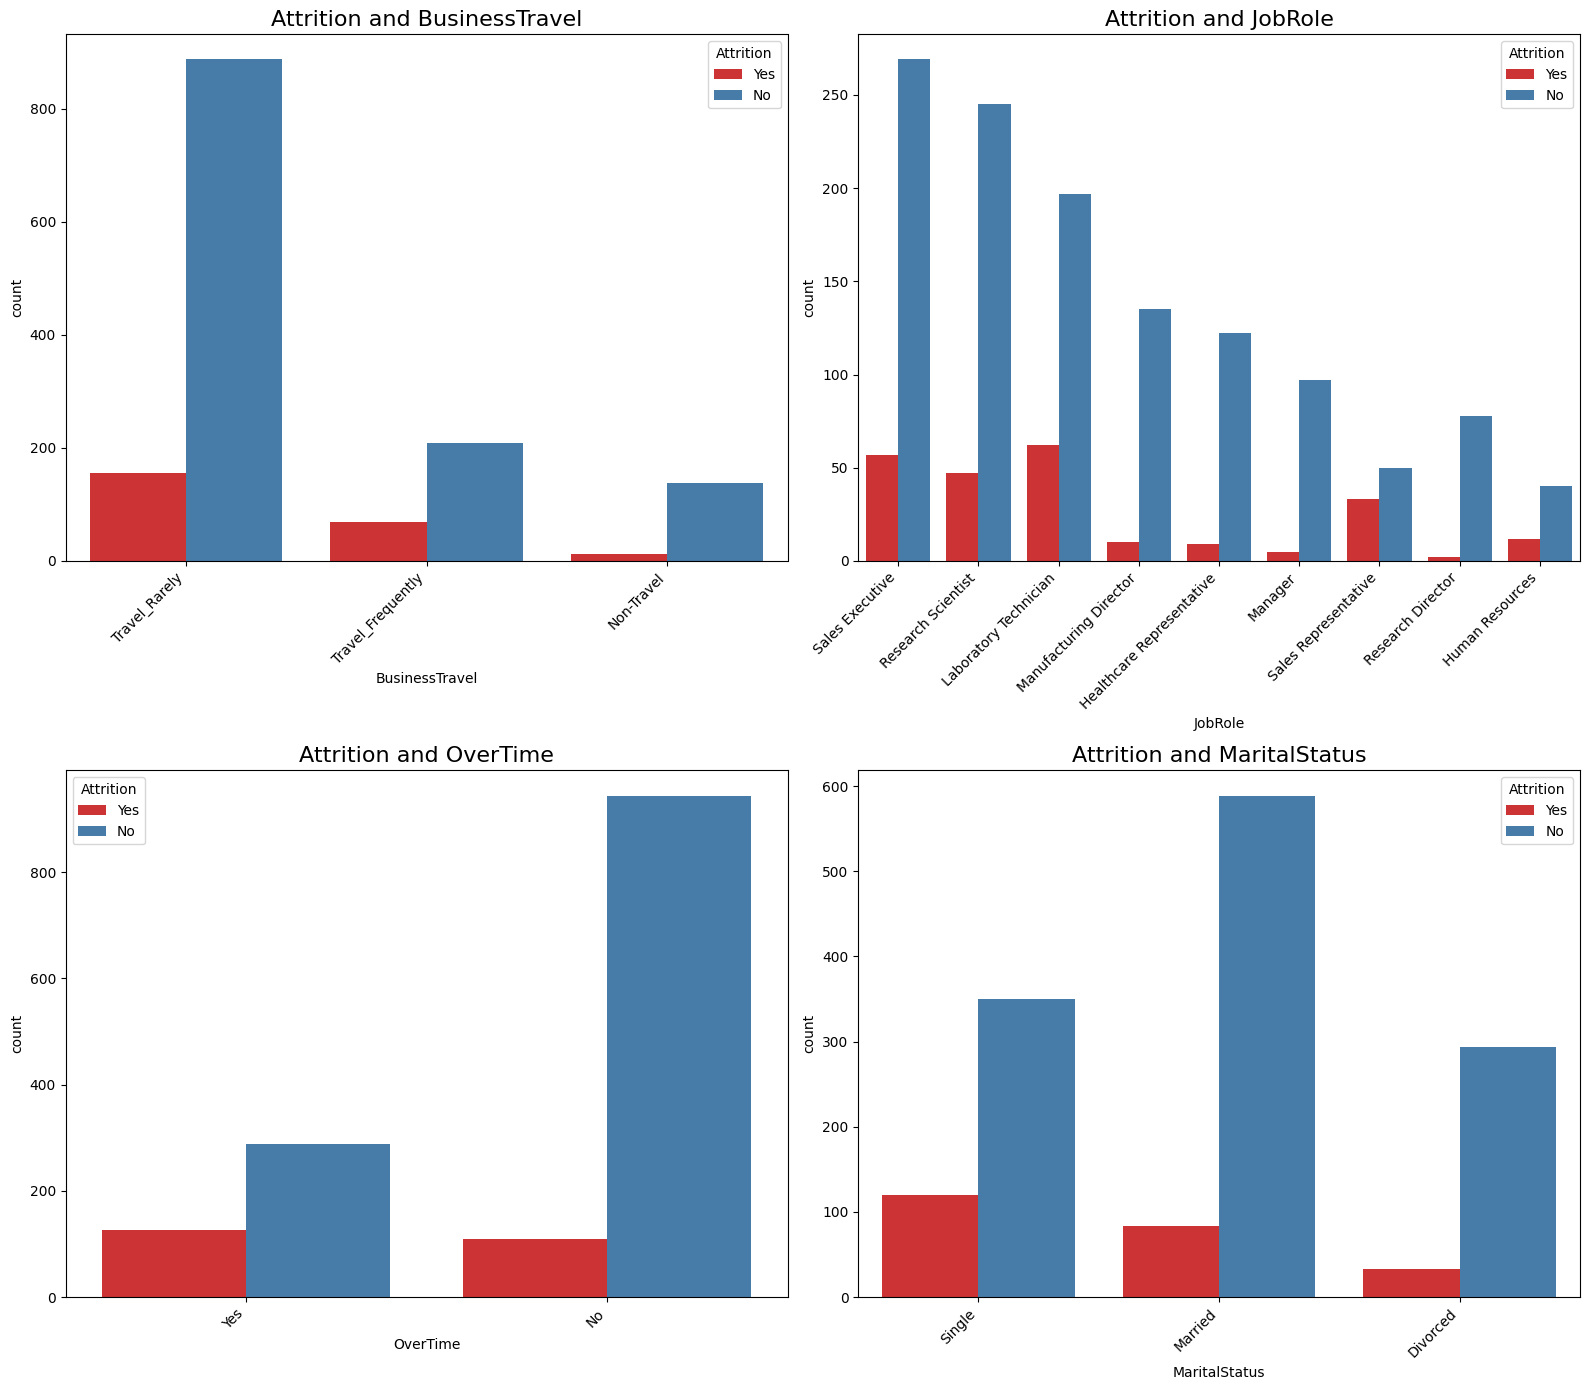

In [26]:
# Visualizing categorical variables vs Attrition variable

# A 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 14))

# Subplot 1
ax1 = sns.countplot(x='BusinessTravel', hue='Attrition', data=df, palette='Set1', ax=axes[0, 0])
ax1.set_title("Attrition and BusinessTravel", fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

# Subplot 2
ax2 = sns.countplot(x='JobRole', hue='Attrition', data=df, palette='Set1', ax=axes[0, 1])
ax2.set_title("Attrition and JobRole", fontsize=16)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right")

# Subplot 3
ax3 = sns.countplot(x='OverTime', hue='Attrition', data=df, palette='Set1', ax=axes[1, 0])
ax3.set_title("Attrition and OverTime", fontsize=16)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha="right")

# Subplot 4
ax4 = sns.countplot(x='MaritalStatus', hue='Attrition', data=df, palette='Set1', ax=axes[1, 1])
ax4.set_title("Attrition and MaritalStatus", fontsize=16)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha="right")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [28]:
corr = df.corr()
corr

<ipython-input-28-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


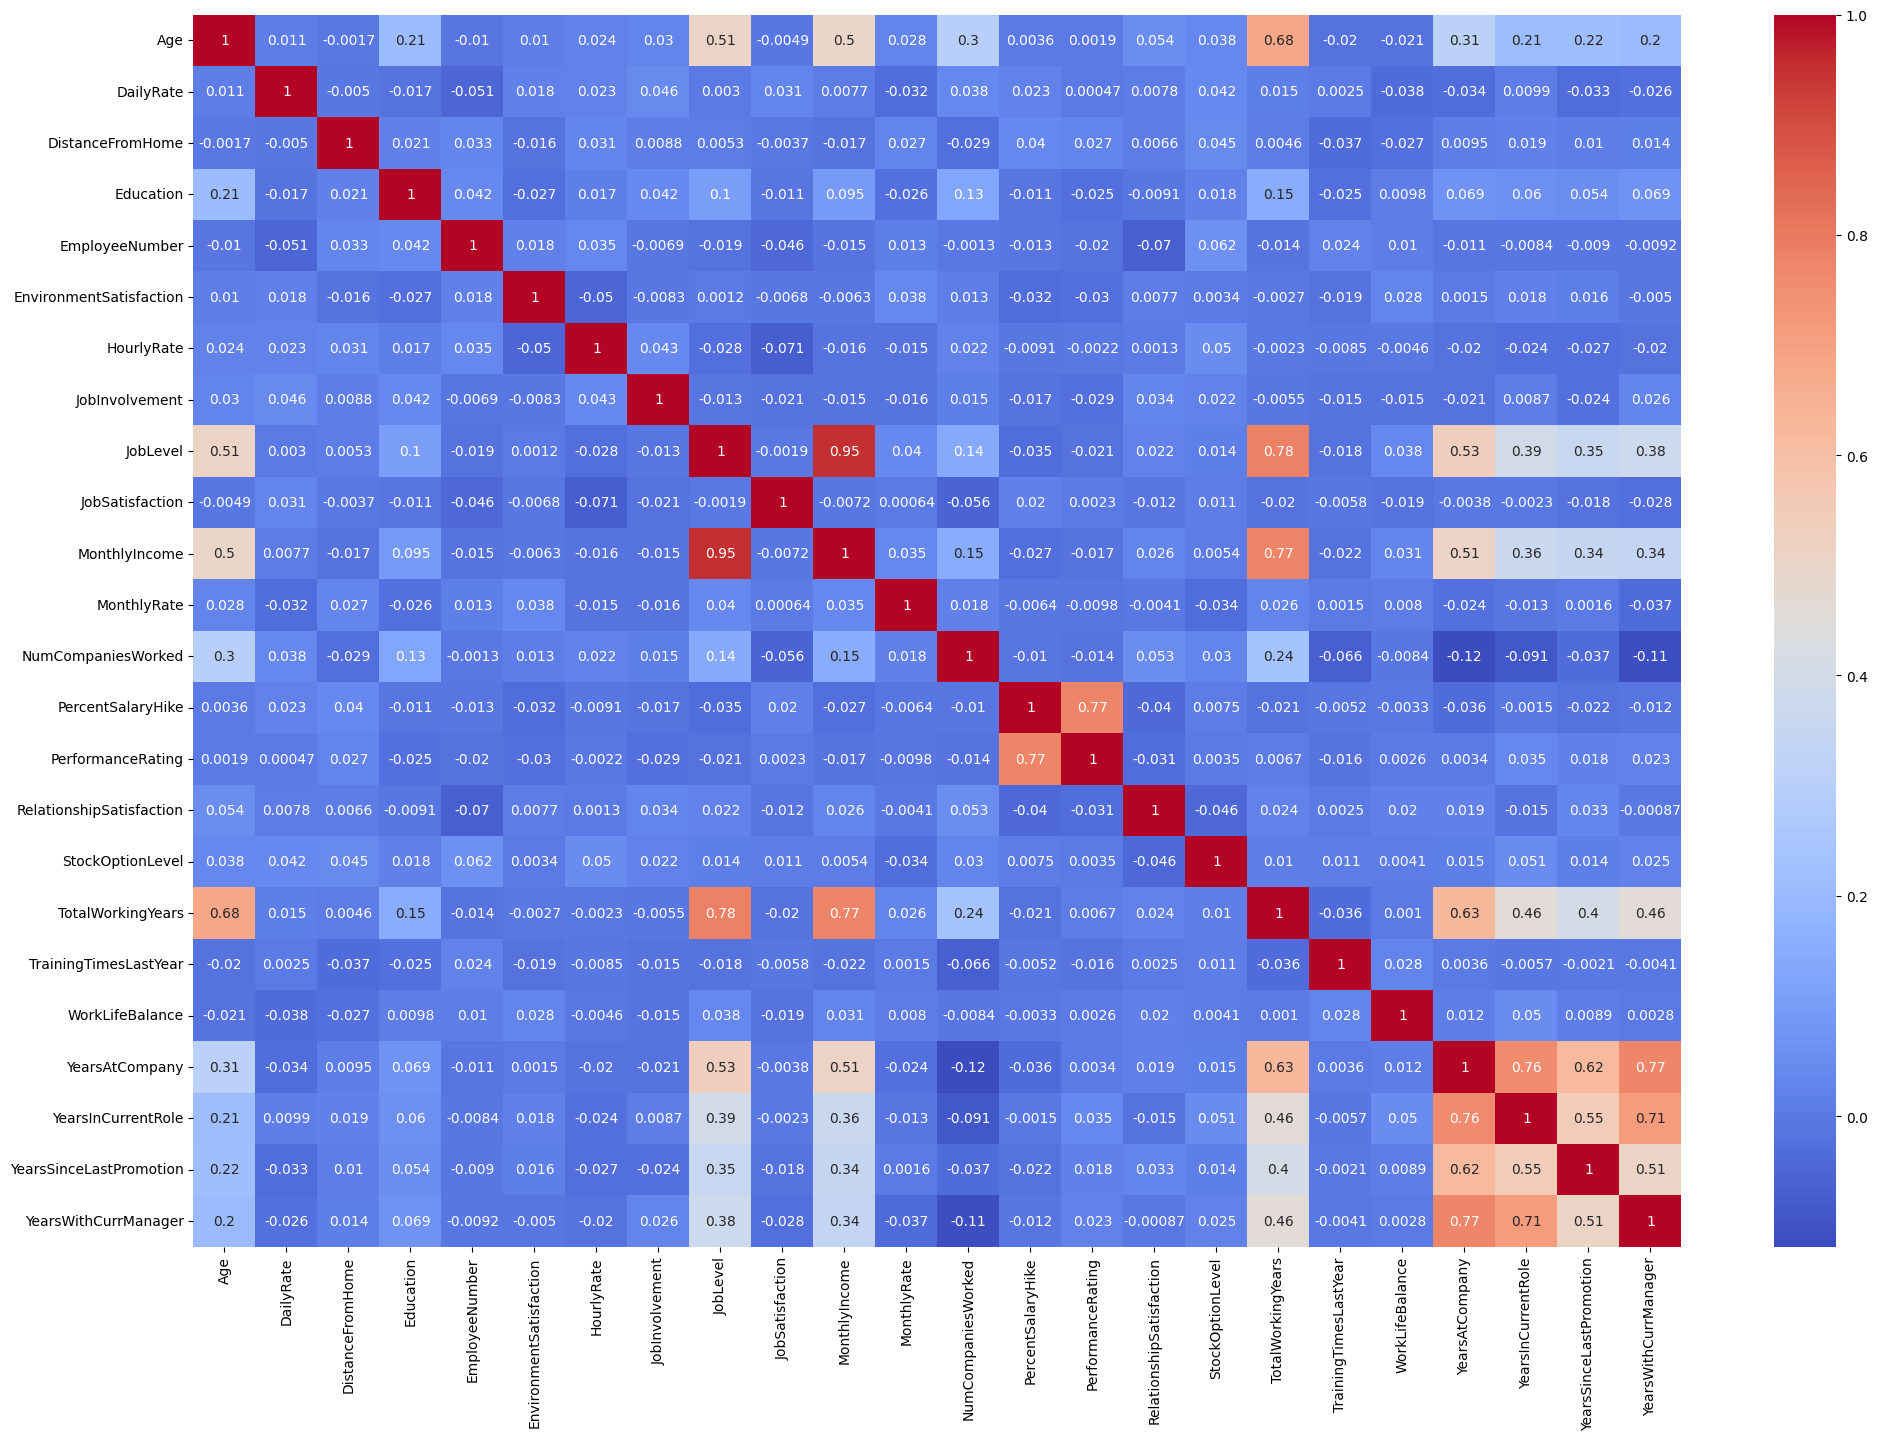

In [29]:
plt.figure(figsize=(24, 16))
ax = sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

In [36]:
# Separate the input features (X) and the target variable (y)
X = df.drop(columns=['Attrition'])  # X contains all columns except 'Attrition'
y = (df['Attrition'] == 'Yes').astype(int)  # y is 1 for 'Yes' and 0 for 'No'


In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X.BusinessTravel=le.fit_transform(X.BusinessTravel)

In [52]:
X.BusinessTravel

0       2
1       1
2       2
3       1
4       2
       ..
1465    1
1466    2
1467    2
1468    1
1469    2
Name: BusinessTravel, Length: 1470, dtype: int64

In [37]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [39]:
X_train.shape

(1176, 31)

In [40]:
X_test.shape

(294, 31)

In [42]:
from sklearn.preprocessing import StandardScaler

# Assuming 'X_train' and 'X_test' contain both numerical and categorical columns

# Select only the numerical columns
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

X_train_numeric = X_train[numerical_cols]
X_test_numeric = X_test[numerical_cols]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the StandardScaler on the numerical columns
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

X_train_processed = np.hstack((X_train_scaled, X_train.drop(columns=numerical_cols).values))
X_test_processed = np.hstack((X_test_scaled, X_test.drop(columns=numerical_cols).values))


In [43]:
y_train.shape

(1176,)

In [54]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)

In [70]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Define the columns to be one-hot encoded
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Separate numerical and categorical columns
X_train_numeric = X_train.drop(columns=categorical_cols)
X_train_categorical = X_train[categorical_cols]

# Create a pipeline for preprocessing
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))]) # Drop the first category to avoid multicollinearity


preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, X_train_numeric.columns), ('cat', categorical_transformer, categorical_cols)])

# Combine preprocessing with the classifier
classifier_lr = Pipeline(steps=[('preprocessor', preprocessor),('classifier', LogisticRegression())])

# Fit the classifier
model=classifier_lr.fit(X_train, y_train)
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'Per...
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime'])])),
                ('classifier', LogisticRegression())])

In [58]:
y_pred = classifier_lr.predict(X_test)

In [59]:
# Loading the metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# Calculate accuracy using the predicted and true target values (y_pred and y_test)
acc = accuracy_score(y_test, y_pred)

# Calculate F1 score using the predicted and true target values (y_pred and y_test)
f1 = f1_score(y_test, y_pred)

# Calculate precision score using the predicted and true target values (y_pred and y_test)
prec = precision_score(y_test, y_pred)

# Calculate recall score using the predicted and true target values (y_pred and y_test)
rec = recall_score(y_test, y_pred)

In [60]:

results = pd.DataFrame([['LogisticRegression', acc, f1, prec, rec]],columns = ["Model", "accuracy", "f1", "precision", "recall"])

results

,Model,accuracy,f1,precision,recall
0,LogisticRegression,0.880952,0.545455,0.75,0.428571


In [61]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_lr, X=X_train, y=y_train, cv=10)
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 88.35%
Standard Deviation is 2.67%


In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
accuracy_score(y_test,y_pred)


0.8809523809523809

In [65]:
confusion_matrix(y_test,y_pred)

array([[238,   7],
       [ 28,  21]])

In [67]:
pd.crosstab(y_test,y_pred)


col_0,0,1
Attrition,,
0,238,7
1,28,21


In [72]:
probability=model.predict_proba(X_test)[:,1]

In [73]:
probability

array([7.58002613e-02, 9.58827992e-02, 5.89265163e-01, 1.38297962e-01,
       7.62629352e-01, 5.10904264e-02, 4.99064505e-01, 5.09580930e-02,
       1.24971263e-03, 3.80123787e-01, 3.17877776e-02, 1.91881367e-01,
       1.83512254e-02, 5.39590025e-01, 6.15377924e-02, 1.46208074e-02,
       1.18960753e-01, 4.61643671e-02, 2.60064594e-02, 2.74998126e-01,
       1.35697015e-01, 6.41626580e-03, 1.62742328e-02, 4.06103355e-02,
       7.47787255e-01, 4.71281943e-01, 6.65456303e-02, 2.90459181e-02,
       6.71260907e-01, 4.04116905e-02, 6.85280924e-03, 2.38349335e-01,
       3.83897100e-02, 4.10951535e-02, 2.78174938e-02, 1.24142646e-02,
       1.94608841e-01, 5.73183335e-02, 1.29764934e-02, 1.05950213e-01,
       3.30364705e-02, 9.27905453e-03, 2.31009323e-03, 5.60886595e-03,
       1.02493290e-02, 5.46332529e-01, 4.18610418e-01, 8.38814649e-04,
       4.54277425e-01, 3.65386357e-01, 5.75069395e-02, 7.81048504e-01,
       2.20517785e-02, 3.68481250e-01, 5.32044325e-01, 2.28344216e-01,
      

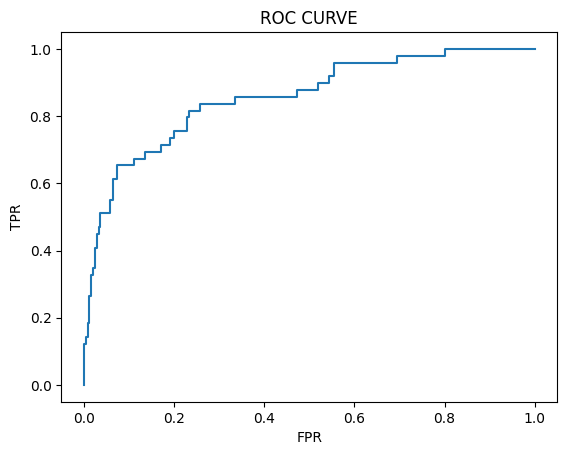

In [75]:
fpr,tpr,threshsholds = roc_curve(y_test,probability)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

In [78]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

In [80]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [81]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the scaled features
X_scaled = scaler.fit_transform(X_encoded)

# Convert the scaled features back to a DataFrame (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [83]:
# Training and testing the Decision Tree model
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)

# Training and testing the Random Forest model
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)

In [84]:
# Training and testing the Decision Tree model
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)

# Training and testing the Random Forest model
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)

In [85]:
# Evaluation of Decision Tree model
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_report = classification_report(y_test, decision_tree_predictions)

print("Decision Tree Model Accuracy:", decision_tree_accuracy)
print("Decision Tree Model Classification Report:")
print(decision_tree_report)

Decision Tree Model Accuracy: 0.7789115646258503
Decision Tree Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       255
           1       0.19      0.21      0.20        39

    accuracy                           0.78       294
   macro avg       0.53      0.54      0.53       294
weighted avg       0.79      0.78      0.78       294



In [86]:
# Evaluation of Random Forest model
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_report = classification_report(y_test, random_forest_predictions)

print("Random Forest Model Accuracy:", random_forest_accuracy)
print("Random Forest Model Classification Report:")
print(random_forest_report)

Random Forest Model Accuracy: 0.8741496598639455
Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294

